In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums that we give to it
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#cleans data and returns first digit
def first_digit(num):
    if pd.isna(num):
        return
    if str(num) == 'Null':
        return
    if str(num) == 'n. def.':
        return
    if num == 0:
        return
    else:
        num = float(num) * 10000000
        return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [246]:
def first_digit_actual(num):
    if pd.isna(num):
        return
    v = str(num)[0]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[0])

In [3]:
all_files = ["Data/1.csv", "Data/5.csv", "Data/11.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
         "Data/25.csv", "Data/28.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/35.csv", "Data/36.csv", 
         "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv", 
         "Data/51.csv", "Data/53.csv", "Data/54.csv", "Data/56.csv", "Data/57_30K_25%.csv", "Data/57_30K_35%.csv", 
         "Data/57_30K_50%.csv", "Data/57_30K_75%.csv", "Data/57_30K_100%.csv", "Data/57_60K_25%.csv",
         "Data/58_lots_of_zeros.csv", "Data/59.csv", "Data/60_T3.csv", "Data/60_T4.csv", "Data/62.csv", 
         "Data/63.csv", "Data/65_peptide_PMSI_normalized.csv", "Data/65_peptide_PMSI_raw.csv", 
         "Data/65_peptide_water_normalized.csv", "Data/65_peptide_water_raw.csv", 
         "Data/65_protein_PMSI_normalized.csv", "Data/65_protein_PMSI_raw.csv", "Data/65_protein_water_normalized.csv", 
         "Data/65_protein_water_raw.csv", "Data/66_has_NA_values.csv", "Data/67.csv", "Data/68.csv", "Data/70.csv", 
         "Data/71.csv", "Data/72.csv", "Data/73.csv", "Data/74.csv", "Data/76.csv", "Data/79.csv", "Data/80.csv", 
         "Data/82.csv", "Data/84_table2.csv", "Data/84_table4_replicate1.csv", "Data/84_table4_replicate2.csv", 
         "Data/84_table4_replicate3.csv", "Data/84_table5_replicate1.csv", "Data/84_table5_replicate2.csv", 
         "Data/84_table5_replicate3.csv", "Data/85_lots_of_zeroes.csv","Data/86_S7.csv", "Data/86_S8.csv", 
         "Data/86_S9.csv", "Data/86_S10.csv", "Data/86_S11.csv", "Data/86_S12.csv", "Data/86_S14.csv",
         "Data/87_has_NA_values.csv","Data/88_table2.csv", "Data/88_table4.csv", "Data/88_table6_sheet1.csv", 
         "Data/88_table6_sheet2.csv", "Data/88_table7.csv", "Data/89_decent_number_of_zeroes.csv", 
         "Data/90_table1_imputed.csv", "Data/90_table1_raw.csv", "Data/90_table3_imputed.csv", 
         "Data/90_table3_raw.csv", "Data/90_table5_imputed.csv", "Data/90_table5_raw.csv", "Data/90_table7.csv",
         "Data/91.csv","Data/92_has_blank_cells.csv", "Data/93.csv", "Data/94.csv", "Data/95_double_digestion.csv", 
         "Data/95_single_digestion.csv", "Data/96_table1.csv", "Data/96_table2.csv", "Data/97_normalized.csv",
         "Data/97_raw.csv", "Data/99.csv", "Data/100_set1.csv", "Data/100_set2.csv"] # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv","Data/66_has_NA_values.csv"
#File 77 has words, no values
# Get rid of files 78 and 98
#90 looks weird because has raw values with small range

In [4]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_digit(num) for num in nums]
        #last_digit = [first_digit_actual(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit

    df1 = get_frequencies(last_digits)


    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies
        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


C:\Users\carol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# df2 = df2.set_index('Element')
df2 = df2.drop([0])
df2.to_csv('Data/first_digit.csv')
print(df2)

   Data/1.csv  Data/5.csv  Data/11.csv  Data/14.csv  Data/19_SHORT.csv  \
1   32.356735     0.00000    31.153604    34.905660           9.848485   
2   17.818316    74.00741    19.570349    20.518868          12.878788   
3   12.244334    25.99259    13.495436    10.613208          16.666667   
4    8.853879     0.00000     8.915644     8.254717          33.333333   
5    7.729869     0.00000     6.869688     5.660377          11.363636   
6    6.679565     0.00000     6.027699     5.896226           4.545455   
7    5.150175     0.00000     4.674221     6.132075           6.060606   
8    4.873779     0.00000     4.650614     3.773585           2.272727   
9    4.293348     0.00000     4.642745     4.245283           3.030303   

   Data/22.csv  Data/25.csv  Data/28.csv  Data/32_LETTER.csv  Data/34.csv  \
1    29.919117    29.578818     2.926587           30.928891    30.181455   
2    18.012133    17.303424    82.126323           17.094192    18.461795   
3    12.568051    12.549808 

In [6]:
df4 = pd.DataFrame(df2).T.stack().reset_index()#.drop(columns=['level_1'])
df4 = df4.rename(columns={0: "Frequency (percentage)", "level_1": "Digit"})
print(df4)

               level_0  Digit  Frequency (percentage)
0           Data/1.csv      1               32.356735
1           Data/1.csv      2               17.818316
2           Data/1.csv      3               12.244334
3           Data/1.csv      4                8.853879
4           Data/1.csv      5                7.729869
..                 ...    ...                     ...
859  Data/100_set2.csv      5                7.490625
860  Data/100_set2.csv      6                6.501516
861  Data/100_set2.csv      7                5.745701
862  Data/100_set2.csv      8                5.133630
863  Data/100_set2.csv      9                4.705006

[864 rows x 3 columns]


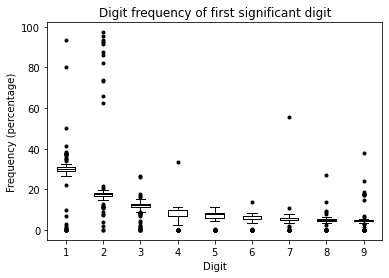

In [7]:
plt.boxplot(df2, sym="k.", medianprops=dict(color="black"))
# plt.xticks([0,1,2,3,4,5,6,7,8,9])
# plt.ylim(-1, 60)
plt.ylabel("Frequency (percentage)")
plt.xlabel("Digit")
plt.title("Digit frequency of first significant digit")
# plt.savefig('Data/fig1a', dpi=300)
plt.show()

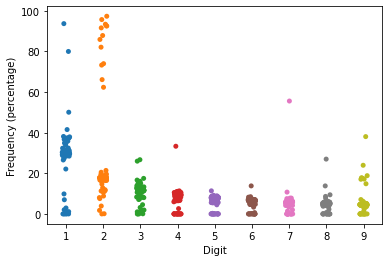

In [8]:
import seaborn as sns
sns.stripplot(x = 'Digit', y = 'Frequency (percentage)', data = df4, jitter=True)
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')
# sns.despine()